# The Greatest Olympians
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)
Dataset URL - https://www.kaggle.com/the-guardian/olympic-games
# 1. Dataset Understanding and getting who won the most medals

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
# Our multiple Datasets
summer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/winter.csv")
track = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/data.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/dictionary.csv")

In [11]:
summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [13]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [14]:
track.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


In [16]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete']=summer['Athlete'].str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [17]:
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
winter['Athlete']=winter['Athlete'].str.title()

In [18]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [ ]:
summer=summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [ ]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [19]:
male_most_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
female_most_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Male Athlete is: ',male_most_medals,'with: ',male_medals,' medals')
print('The Highest Decorated Female Athlete is: ',female_most_medals,'with: ',female_medals,' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


![](https://miro.medium.com/max/750/1*3oyu_HQTdAjNGywwpl97MQ@2x.jpeg)
![](https://www.teamusa.org/-/media/TeamUSA/Swimming/Phelps_Michael/2016/phelps_michael_1216sicover_800x500.jpg?h=500&la=en&w=800&hash=0D45845CD26AD2D943E32A49F2508F9FFC8B039D)

Breakdown by Medal

In [30]:
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [31]:
medals = medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns = [['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


# 2. Let's check Medals by Country

In [33]:
medals_country = summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country = medals_country.pivot('Country','Medal','Gender').fillna(0)
medals_country

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,0.0,0.0,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,0.0,1.0


In [34]:
top = medals_country.sort_values(by='Gold',ascending=False)[:11]
top

Medal,Bronze,Gold,Silver
Country,,,
USA,1098.0,2235.0,1252.0
URS,584.0,838.0,627.0
GBR,553.0,546.0,621.0
ITA,404.0,476.0,416.0
GER,475.0,452.0,378.0
HUN,351.0,412.0,316.0
FRA,497.0,408.0,491.0
SWE,328.0,349.0,367.0
GDR,225.0,329.0,271.0


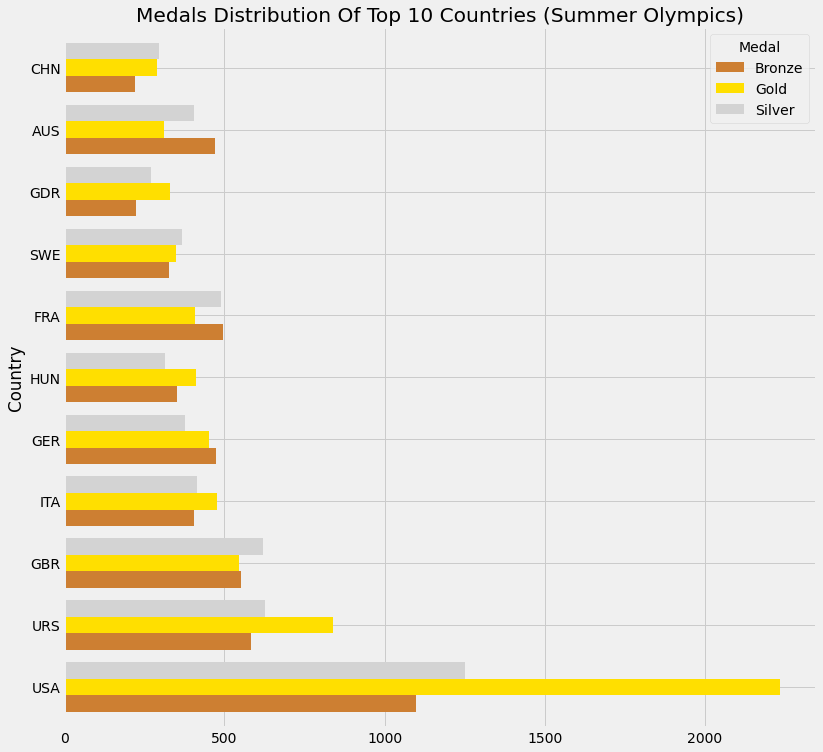

In [37]:
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

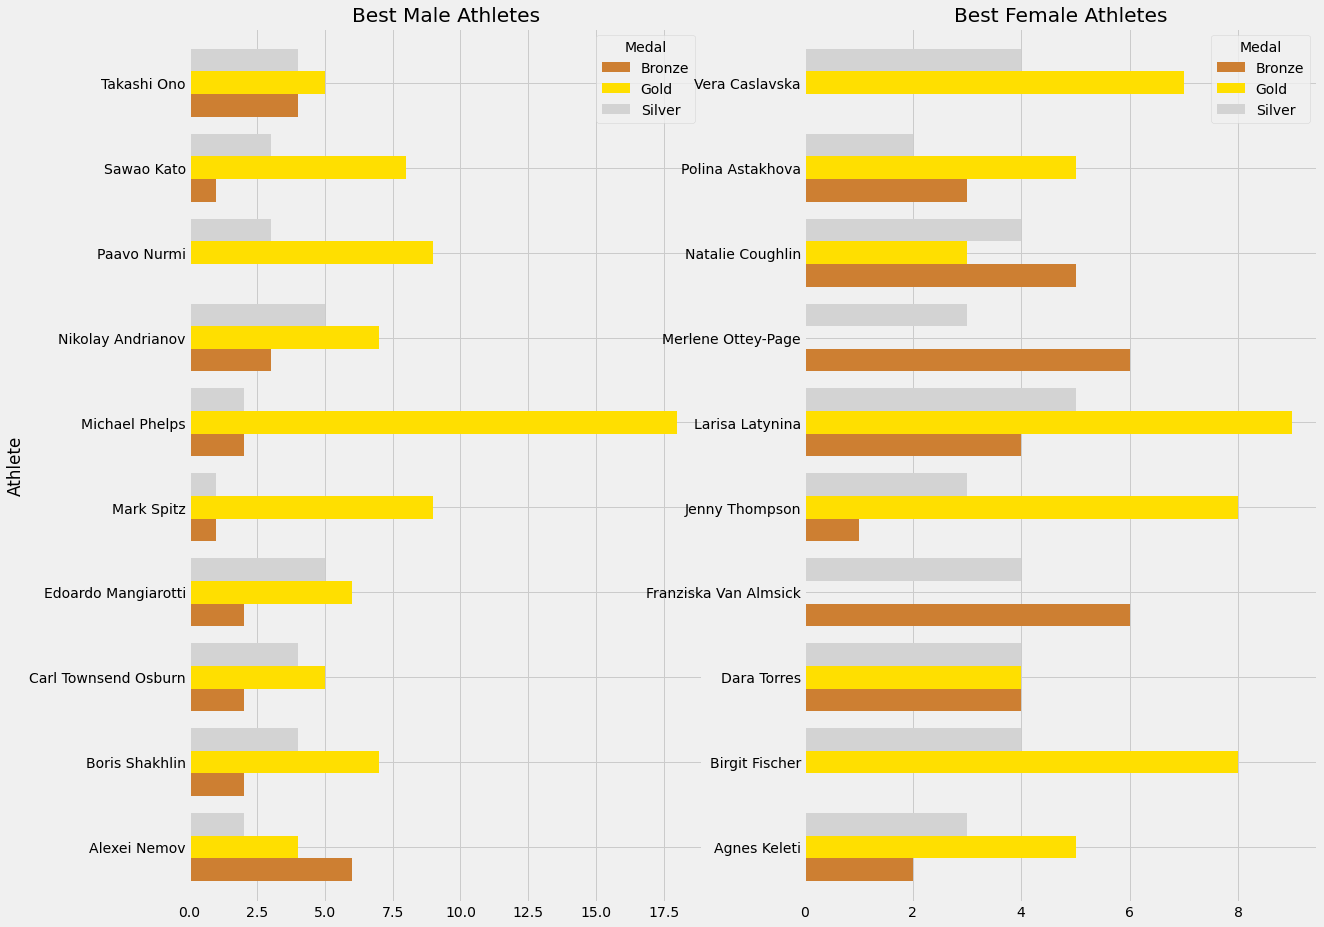

In [41]:
fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [42]:
summer['Discipline'].unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [55]:
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'

test=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold


In [56]:
test=test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold


In [58]:
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test.head()

,Country,Discipline,Sport
0,AUS,Athletics,84
1,AUS,Hockey,189
2,AUS,Rowing,135
3,AUS,Sailing,46
4,AUS,Shooting,10


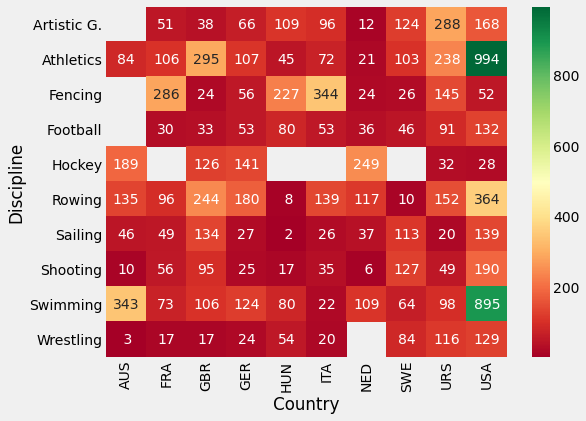

In [59]:
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

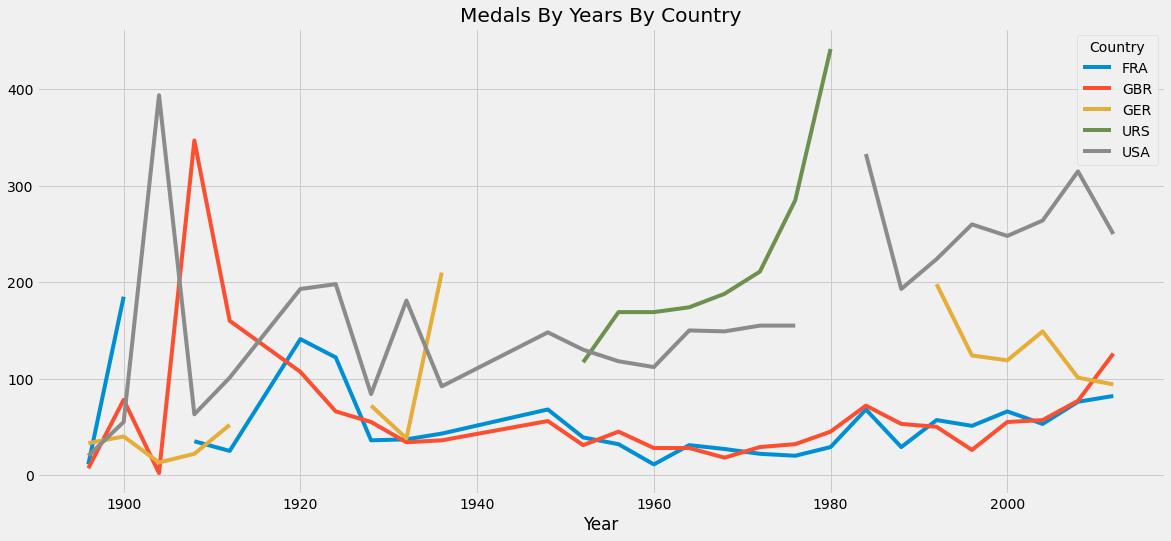

In [60]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

# 3. Winter Game Analysis

In [62]:
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Ole Einar Bjoerndalen with:  13  medals
The Highest Decorated Female Athlete is:  Stefania Belmondo with:  10  medals


### Athletes with the Highest Medal Type

In [63]:
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [64]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map

,Country,Code,Medal
0,Australia,AUS,15
1,Austria,AUT,280
2,Belarus,BLR,15
3,Belgium,BEL,13
4,Bulgaria,BUL,6
5,Canada,CAN,625
6,China,CHN,82
7,Croatia,CRO,11
8,Czech Republic,CZE,75
9,Denmark,DEN,5


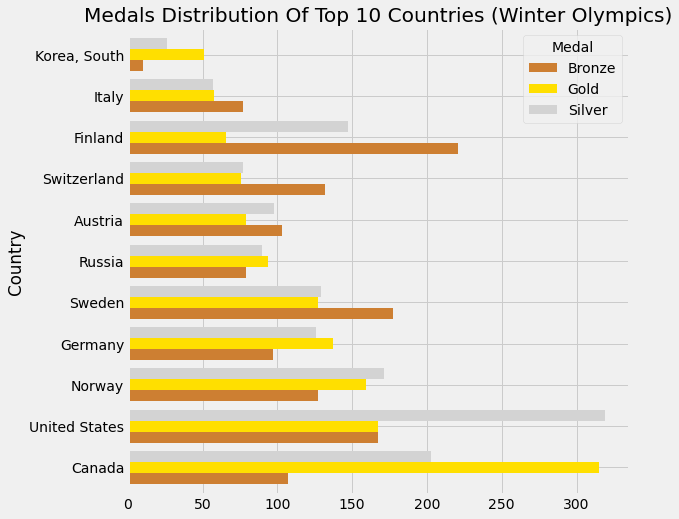

In [65]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

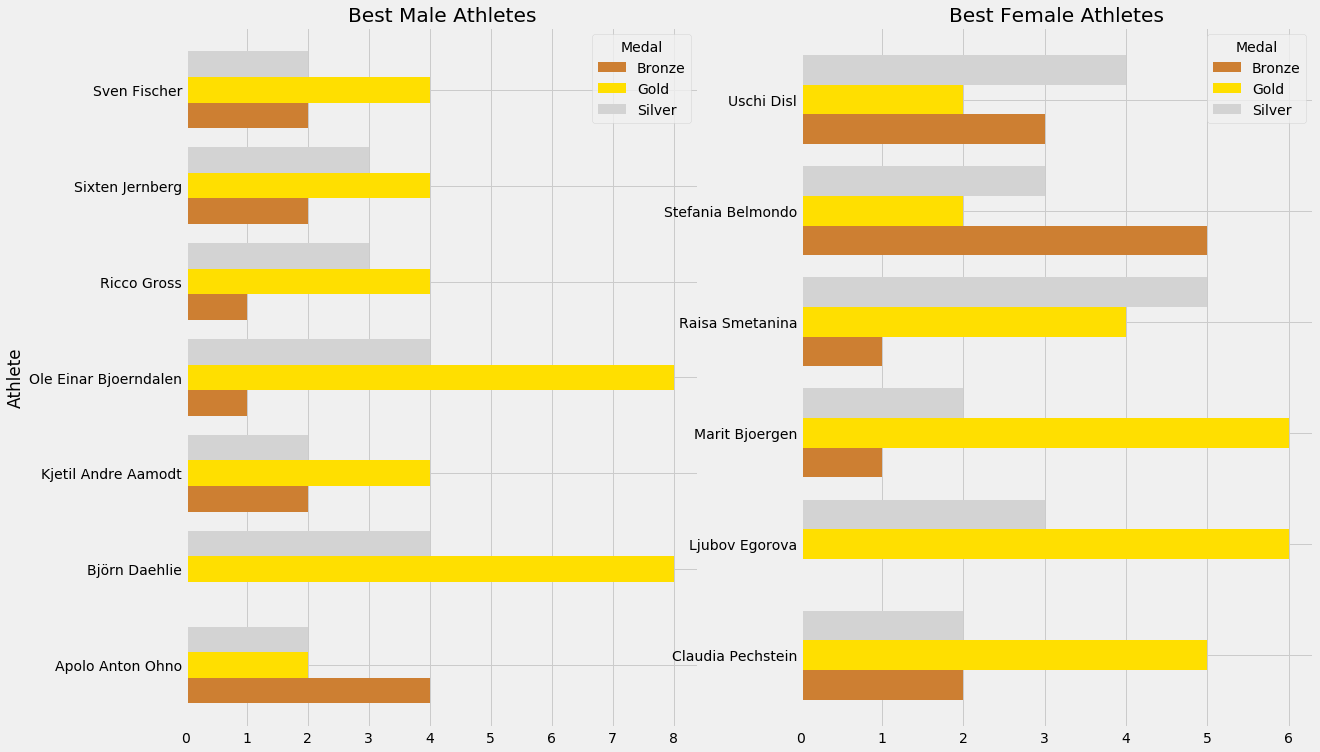

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,12))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:10])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

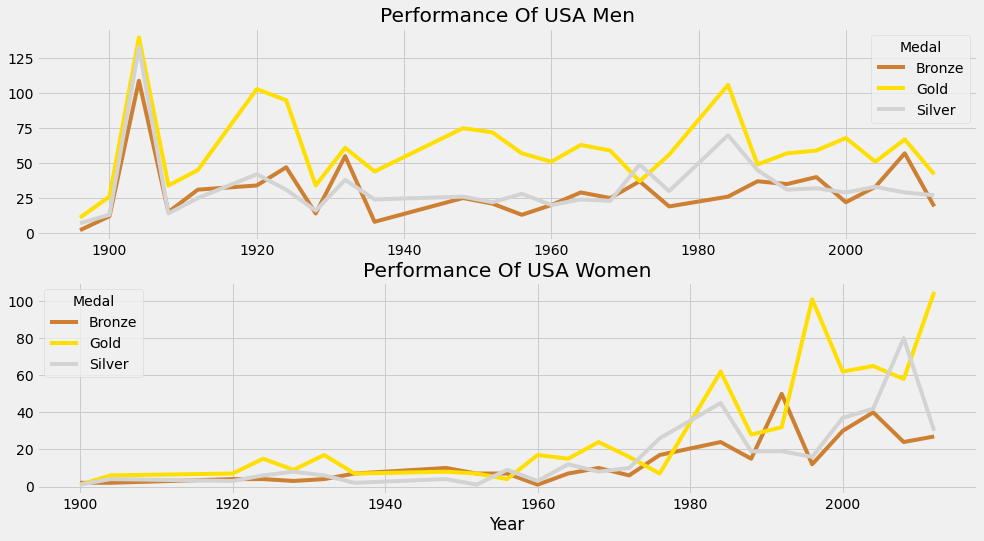

In [80]:
USA_medal_male=summer[(summer['Country']=='USA')&(summer['Gender']=='Men')]
USA_medal_female=summer[(summer['Country']=='USA')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()